In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
TRAIN_PATH = "../data/train.csv"
TEST_PATH = "../data/test.csv"

CATEGORICAL = ["Sex", "Pclass", "Cabin", "Embarked"]
NUMERICAL = ["Age", "Fare", "SibSp", "Parch"]

LABEL = "Survived"
COLS_TO_TRAIN = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
COLS_TO_TRAIN_CAT = CATEGORICAL.copy()
COLS_TO_TRAIN_CAT.remove("Cabin")
COLS_TO_TRAIN_NUM = NUMERICAL

In [3]:
train = pd.read_csv(TRAIN_PATH, index_col=0)
test = pd.read_csv(TEST_PATH)

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train.describe()[NUMERICAL]

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


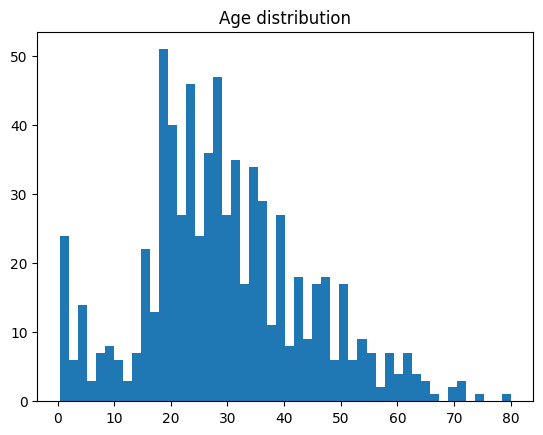

In [7]:
plt.hist(train["Age"], bins=50)
plt.title("Age distribution")
plt.show()

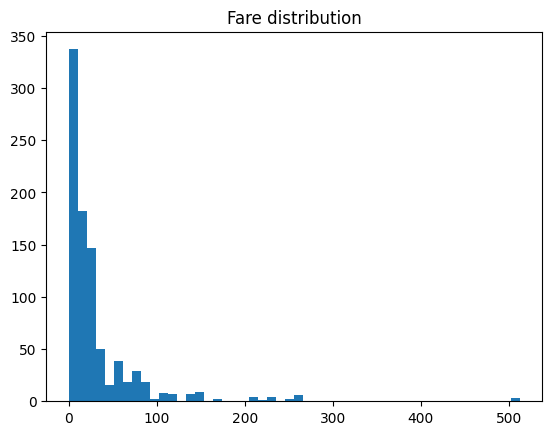

In [8]:
plt.hist(train["Fare"], bins=50)
plt.title("Fare distribution")
plt.show()

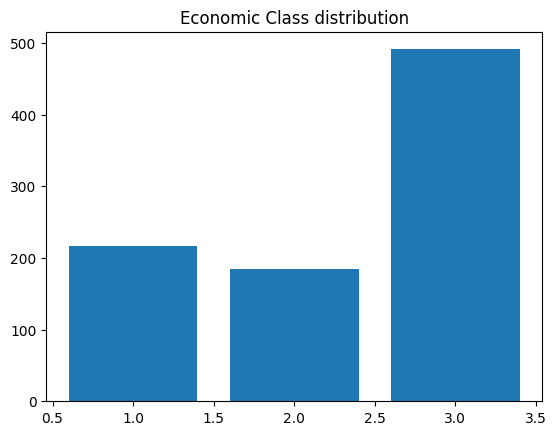

In [9]:
plt.bar(train["Pclass"].value_counts().index, train["Pclass"].value_counts().values)
plt.title("Economic Class distribution")
plt.show()

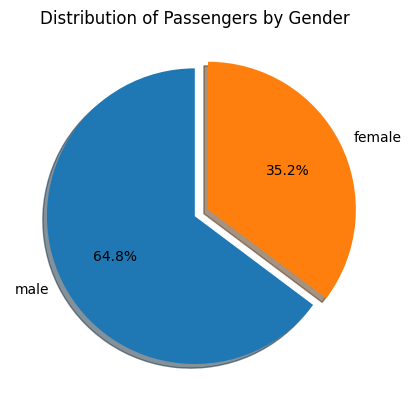

In [10]:
plt.pie(train["Sex"].value_counts(), labels=["male", "female"], autopct='%1.1f%%', explode=(0, 0.1), startangle=90, shadow=True)
plt.title("Distribution of Passengers by Gender")
plt.show()

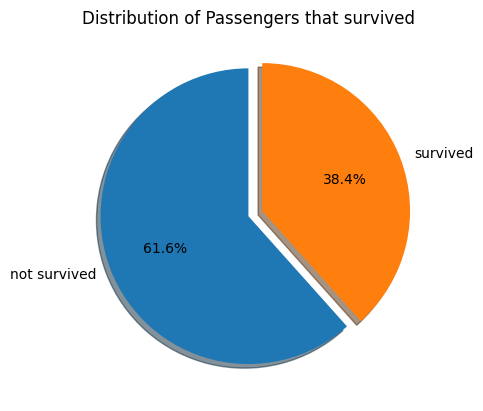

In [11]:
plt.pie(train[LABEL].value_counts(), labels=["not survived", "survived"], autopct='%1.1f%%', explode=(0, 0.1), startangle=90, shadow=True)
plt.title("Distribution of Passengers that survived")
plt.show()

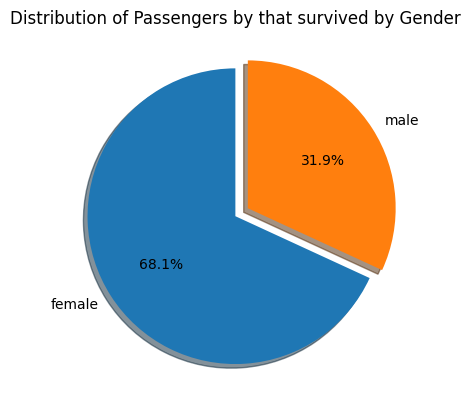

In [12]:
data_to_plot = train.loc[train[LABEL] == 1, "Sex"].value_counts()

plt.pie(data_to_plot, labels=data_to_plot.index, autopct='%1.1f%%', explode=(0, 0.1), startangle=90, shadow=True)
plt.title("Distribution of Passengers by that survived by Gender")
plt.show()

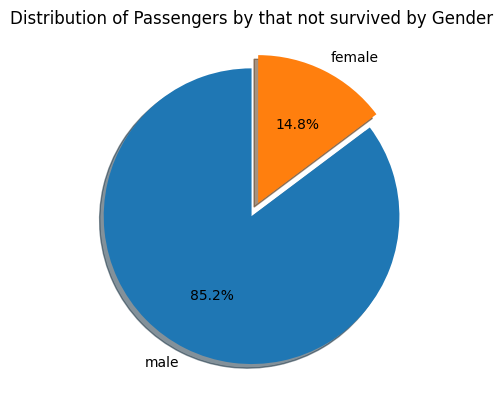

In [13]:
data_to_plot = train.loc[train[LABEL] == 0, "Sex"].value_counts()

plt.pie(data_to_plot, labels=data_to_plot.index, autopct='%1.1f%%', explode=(0, 0.1), startangle=90, shadow=True)
plt.title("Distribution of Passengers by that not survived by Gender")
plt.show()

# Feature engineering

In [14]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, COLS_TO_TRAIN_NUM),
        ('cat', categorical_transformer, COLS_TO_TRAIN_CAT)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [15]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
X_train = train[COLS_TO_TRAIN]
y_train = train[LABEL]

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])]))])

In [18]:
X_transformed = pipeline.transform(X_train)

In [19]:
X_transformed.shape

(891, 12)

In [20]:
transformed_feature_names = pipeline.named_steps['preprocessor']\
    .named_transformers_['cat']\
    .named_steps['onehot']\
    .get_feature_names_out(COLS_TO_TRAIN_CAT)

transformed_feature_names = list(transformed_feature_names) + COLS_TO_TRAIN_NUM

In [22]:
transformed_df = pd.DataFrame(X_transformed, columns=transformed_feature_names).assign(Label = y_train.values)

In [23]:
transformed_df

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Age,Fare,SibSp,Parch,Label
0,-0.592481,-0.502445,0.432793,-0.473674,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,0.638789,0.786845,0.432793,-0.473674,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,-0.284663,-0.488854,-0.474545,-0.473674,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.407926,0.420730,0.432793,-0.473674,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.407926,-0.486337,-0.474545,-0.473674,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.207709,-0.386671,-0.474545,-0.473674,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
887,-0.823344,-0.044381,-0.474545,-0.473674,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
888,0.000000,-0.176263,0.432793,2.008933,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
889,-0.284663,-0.044381,-0.474545,-0.473674,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [24]:
transformed_df.corr()["Label"].sort_values(ascending=False)

Label         1.000000
Pclass_3      0.543351
Embarked_Q    0.285904
Sex_male      0.257307
Fare          0.168240
Embarked_S    0.093349
Pclass_2      0.081629
SibSp         0.003650
Pclass_1     -0.035322
Sex_female   -0.069809
Parch        -0.149683
Age          -0.322308
Embarked_C   -0.543351
Name: Label, dtype: float64

In [25]:
transformed_df.to_csv("../data/train_transformed.csv", index=False)

In [27]:
X_test = test[COLS_TO_TRAIN]

X_test_transformed = pipeline.transform(X_test)

In [29]:
test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_feature_names)

In [30]:
test_transformed_df.to_csv("../data/test_transformed.csv", index=False)